Data Visualizations and Maps

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins

%matplotlib inline
plt.style.use('seaborn-white')

In [72]:
df = pd.read_csv('/Users/mille/Desktop/Capstone 2 - Experimental Design/cleaned_UFO.csv')


In [73]:
df.head()

,date_time,city,state,country,shape,duration_sec,duration_hours/min,comments,date_posted,Latitude,Longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB 44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester 44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1-2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [74]:
df = df.drop(columns=['date_time', 'duration_hours/min'])
df

,city,state,country,shape,duration_sec,comments,date_posted,Latitude,Longitude
0,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,lackland afb,tx,NaN,light,7200,1949 Lackland AFB 44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester 44 En...,1/21/2008,53.2,-2.916667
3,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,bristol,tn,us,sphere,300,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889
6,penarth (uk/wales),NaN,gb,circle,180,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,norwalk,ct,us,disk,1200,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.408333
8,pell city,al,us,disk,180,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,live oak,fl,us,disk,120,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


In [75]:
df['country'] = df['country'].str.upper()
df['state'] = df['state'].str.upper()
df['shape'] = df['shape'].str.title()  
df['city'] = df['city'].str.title()  



In [76]:
df.head()

,city,state,country,shape,duration_sec,comments,date_posted,Latitude,Longitude
0,San Marcos,TX,US,Cylinder,2700,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,Lackland Afb,TX,NaN,Light,7200,1949 Lackland AFB 44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,Chester (Uk/England),NaN,GB,Circle,20,Green/Orange circular disc over Chester 44 En...,1/21/2008,53.2,-2.916667
3,Edna,TX,US,Circle,20,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,Kaneohe,HI,US,Light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [77]:
df.dropna()

,city,state,country,shape,duration_sec,comments,date_posted,Latitude,Longitude
0,San Marcos,TX,US,Cylinder,2700,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,Edna,TX,US,Circle,20,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,Kaneohe,HI,US,Light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,Bristol,TN,US,Sphere,300,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889
7,Norwalk,CT,US,Disk,1200,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.408333
8,Pell City,AL,US,Disk,180,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,Live Oak,FL,US,Disk,120,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167
10,Hawthorne,CA,US,Circle,300,ROUND 44 ORANGE 44 WITH WHAT I WOULD SAY W...,10/31/2003,33.9163889,-118.351667
11,Brevard,NC,US,Fireball,180,silent red /orange mass of energy floated by t...,6/12/2008,35.2333333,-82.734444
12,Bellmore,NY,US,Disk,1800,silver disc seen by family and neighbors,5/11/2000,40.6686111,-73.527500


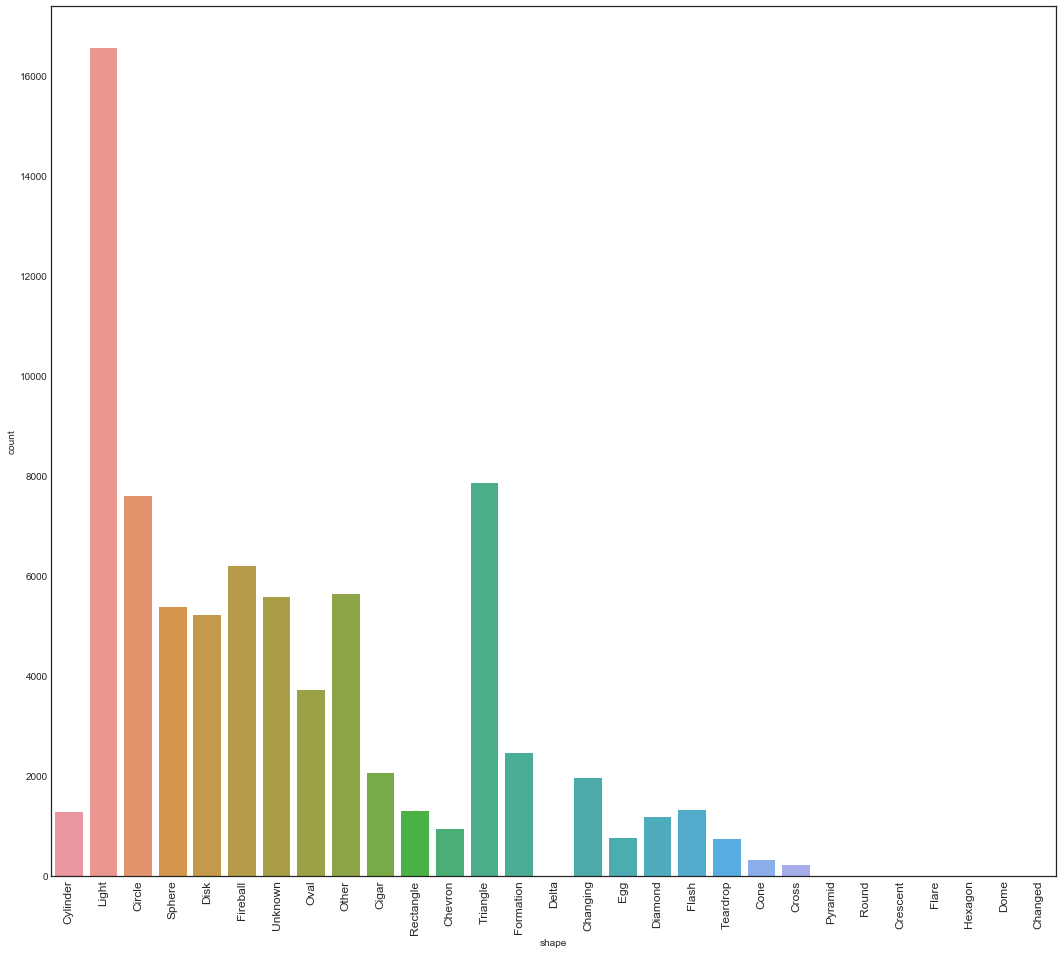

In [78]:
plt.figure(figsize=(18,16))
ax = sns.countplot(x="shape", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=90, ha="center")


plt.show()

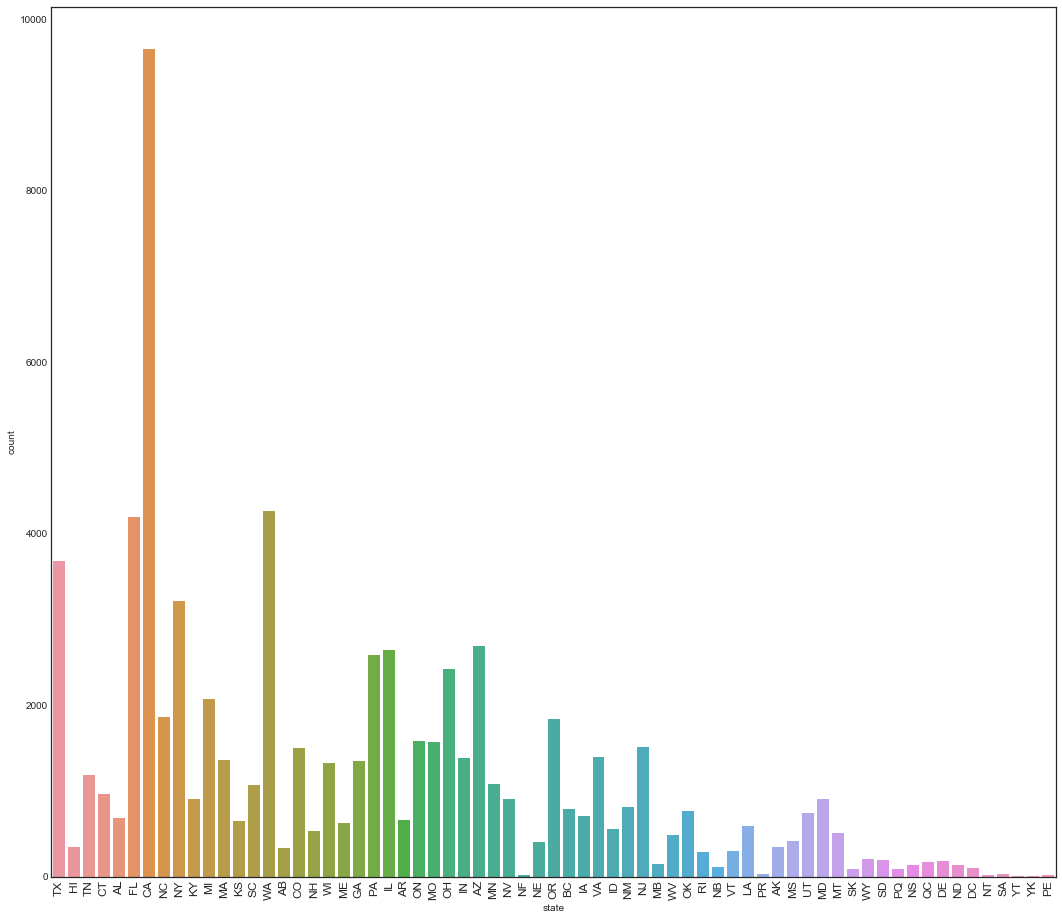

In [79]:
plt.figure(figsize=(18,16))
ax = sns.countplot(x="state", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=90, ha="center")


plt.show()

In [80]:
df.dtypes

#change data types in several columns

city             object
state            object
country          object
shape            object
duration_sec     object
comments         object
date_posted      object
Latitude         object
Longitude       float64
dtype: object

In [81]:


df['Latitude'] = df[['Latitude']].convert_objects(convert_numeric=True)
df['duration_sec'] = df[['duration_sec']].convert_objects(convert_numeric=True)
df['city'] = df[['city']].convert_objects(convert_numeric=True)
df['state'] = df[['state']].convert_objects(convert_numeric=True)
df['shape'] = df[['shape']].convert_objects(convert_numeric=True)
df['date_posted'] = df[['date_posted']].convert_objects(convert_numeric=True)


df.head()

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_time

,city,state,country,shape,duration_sec,comments,date_posted,Latitude,Longitude
0,San Marcos,TX,US,Cylinder,2700.0,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,Lackland Afb,TX,NaN,Light,7200.0,1949 Lackland AFB 44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,Chester (Uk/England),NaN,GB,Circle,20.0,Green/Orange circular disc over Chester 44 En...,1/21/2008,53.200000,-2.916667
3,Edna,TX,US,Circle,20.0,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,Kaneohe,HI,US,Light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611


In [82]:
df.dtypes

city             object
state            object
country          object
shape            object
duration_sec    float64
comments         object
date_posted      object
Latitude        float64
Longitude       float64
dtype: object

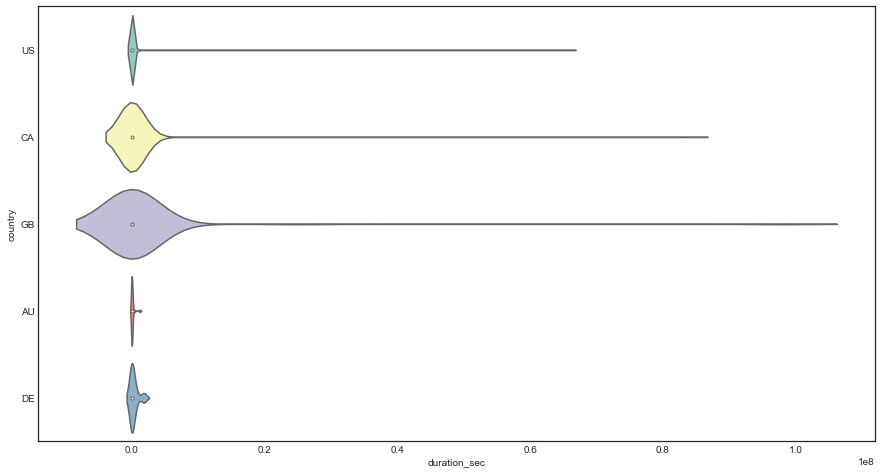

In [85]:
fig,ax = plt.subplots(figsize=(15,8))

ax = sns.violinplot(x="duration_sec", y="country",
                    data=df[df.duration_sec > 3000],
                    scale="width", palette="Set3")

In [87]:
ufo = df.dropna()
ufo

,city,state,country,shape,duration_sec,comments,date_posted,Latitude,Longitude
0,San Marcos,TX,US,Cylinder,2700.0,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
3,Edna,TX,US,Circle,20.0,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,Kaneohe,HI,US,Light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
5,Bristol,TN,US,Sphere,300.0,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
7,Norwalk,CT,US,Disk,1200.0,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333
8,Pell City,AL,US,Disk,180.0,Strobe Lighted disk shape object observed clos...,3/19/2009,33.586111,-86.286111
9,Live Oak,FL,US,Disk,120.0,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.294722,-82.984167
10,Hawthorne,CA,US,Circle,300.0,ROUND 44 ORANGE 44 WITH WHAT I WOULD SAY W...,10/31/2003,33.916389,-118.351667
11,Brevard,NC,US,Fireball,180.0,silent red /orange mass of energy floated by t...,6/12/2008,35.233333,-82.734444
12,Bellmore,NY,US,Disk,1800.0,silver disc seen by family and neighbors,5/11/2000,40.668611,-73.527500


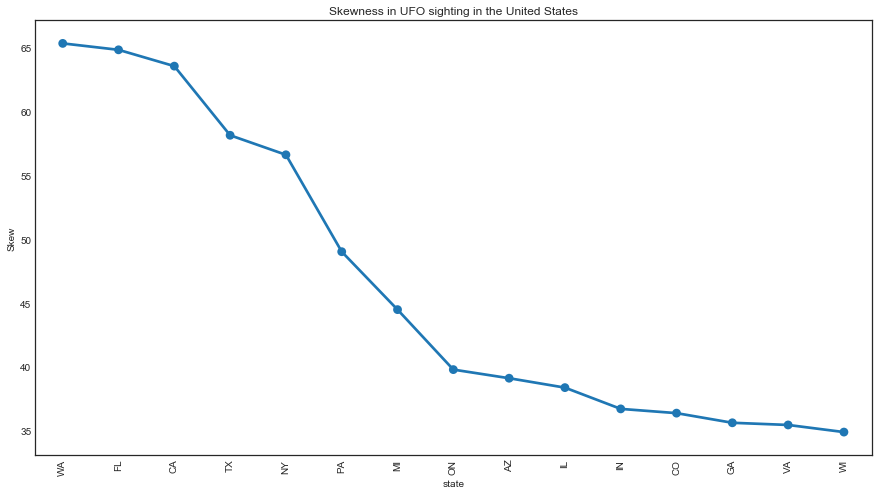

In [91]:
state_col = df[['state','duration_sec']].groupby(['state']).skew()
state_col = state_col['duration_sec'].sort_values(ascending=False)[:15]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.pointplot(x = state_col_keys,y =state_col_val)

plt.title('Skewness in UFO sighting in the United States')
plt.ylabel('Skew')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

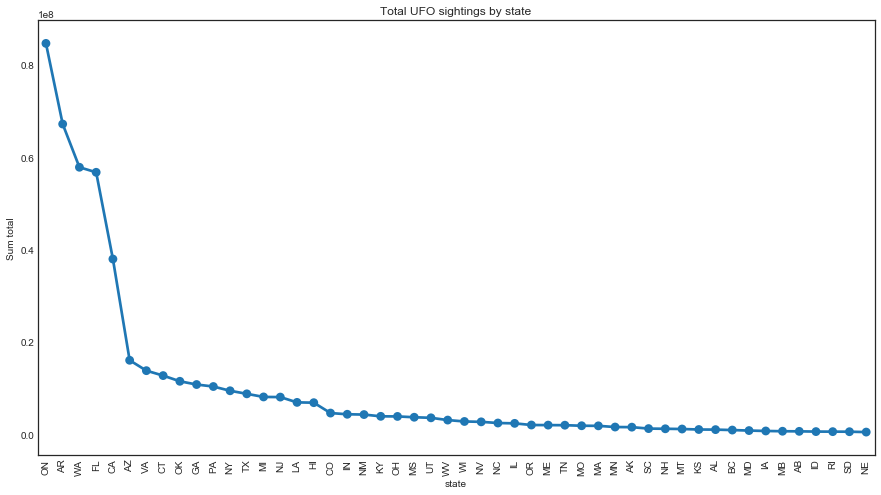

In [96]:
state_col = df[['state','duration_sec']].groupby(['state']).sum()
state_col = state_col['duration_sec'].sort_values(ascending=False)[:50]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.pointplot(x = state_col_keys,y =state_col_val)

plt.title('Total UFO sightings by state')
plt.ylabel('Sum total')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

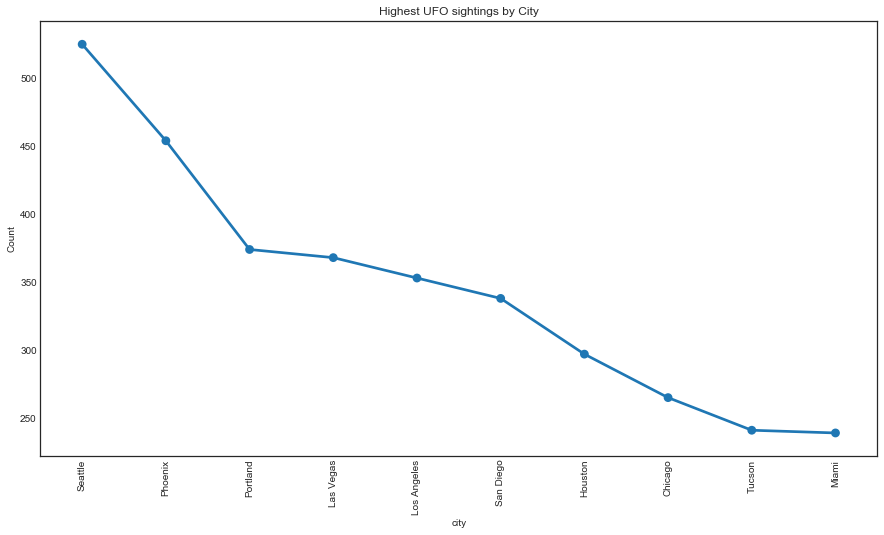

In [98]:
state_col = df[['city','duration_sec']].groupby(['city']).count()
state_col = state_col['duration_sec'].sort_values(ascending=False)[:10]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.pointplot(x = state_col_keys,y =state_col_val)

plt.title('Highest UFO sightings by City')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

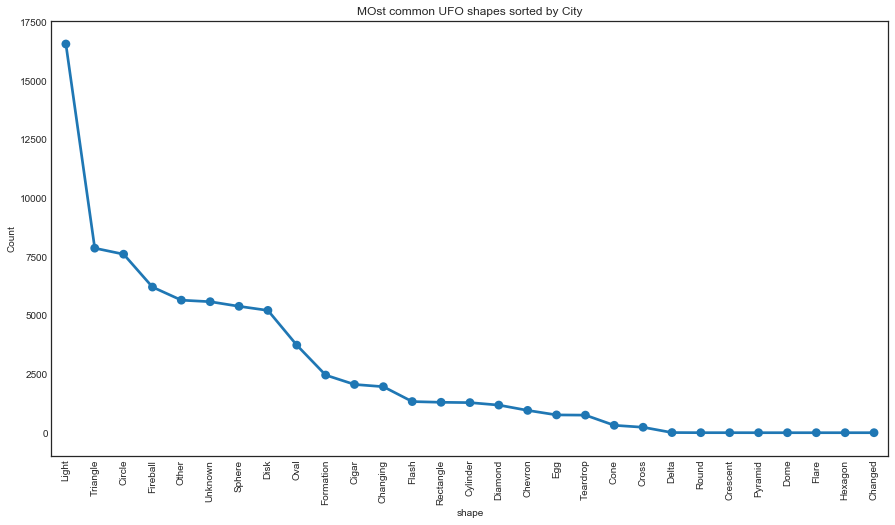

In [101]:
state_col = df[['shape','city']].groupby(['shape']).count()
state_col = state_col['city'].sort_values(ascending=False)[:50]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.pointplot(x = state_col_keys,y =state_col_val)

plt.title('MOst common UFO shapes sorted by City')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [ ]:
df.to_csv("part2_UFO.csv", index=False)